In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import random
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
#Setup
from pathlib import Path

IMAGES_PATH = Path() / "results"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="jpg", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
#Read new csv and show
df = pd.read_csv('./data/KD.csv')
df.drop('Unnamed: 0', axis= 1, inplace= True) #No needed it 
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47.0,6700.0,4.900000,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54.0,7800.0,6.200000,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49.0,6600.0,5.400000,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51.0,7200.0,5.900000,no,no,no,good,no,no,1


In [5]:
#Input features with if-sentence
col_ot = 'pcv'
col_rc = 'rc'
col_wc = 'wc'
col_used = [col_ot, col_rc, col_wc]
col_dep = 'classification' #for predictions
all_cols= (df[col_ot]<= 38.8).all() and (df[col_rc] <= 4.7).all() and (df[col_wc] <= 8406.1).all()

#n_pcv =(df[col_ot] >= 45.0).all()
if all_cols == True:
   col_dep == 0
else:
   col_dep == 1
#col_ot = n_pcv

   
col_ot1 = [col for col in col_used] #input features

df[col_dep].value_counts()

0    250
1    150
Name: classification, dtype: int64

In [6]:
#train_test_split and x, y declarations
x = df[col_ot1]
y = df[col_dep]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
print(len(x_train) , len(y_train))

320 320


In [7]:
len(y_test)

80

In [8]:
sum(y_test == 0)

52

In [9]:
sum(y_test == 0) / len(y_test)

0.65

In [10]:
#Encoder
encoder = LabelEncoder()

for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

df['classification'] = encoder.fit_transform(df['classification'])


In [11]:
#DTC and accuracy_score
acd = tree.DecisionTreeClassifier()

model = acd.fit(x_train, y_train)

y_pred = acd.predict(x_test)
acd_acc = accuracy_score(y_test, y_pred)

print (f"Accuracy_score is:" , acd_acc)

Accuracy_score is: 0.9125


In [12]:
# Just for examples
arr_pcv =[]
arr_rc = []
arr_wc = []
for i in range(80):
    arr_pcv.append(random.uniform(0.1,100.0))
    arr_rc.append(random.uniform(0.1,10.0))
    arr_wc.append(random.uniform(0.1,10000.0))
    #print(arr_pcv)
print(len(y_pred), len(arr_pcv), len(arr_wc))

80 80 80


In [13]:
pcv_pred = pd.DataFrame({'PCV generado': arr_pcv, 'RC generado': arr_rc, 'WC generado': arr_wc, 'KND?': y_pred})
pcv_pred

,PCV generado,RC generado,WC generado,KND?
0,62.517445,6.298296,5103.290446,0
1,79.770179,5.565178,3129.419715,1
2,36.432051,0.372849,662.234202,0
3,77.418578,3.500812,152.575269,0
4,10.246771,3.092926,5182.813478,0
...,...,...,...,...
75,19.933726,9.575235,5445.063964,0
76,55.536532,1.690624,1676.923538,0
77,4.801863,4.321597,6210.891735,1
78,16.735292,1.904699,7720.798913,1


[Text(0.4182692307692308, 0.9642857142857143, 'X[0] <= 39.5\ngini = 0.472\nsamples = 320\nvalue = [198, 122]'),
 Text(0.19230769230769232, 0.8928571428571429, 'X[1] <= 5.65\ngini = 0.044\nsamples = 178\nvalue = [174, 4]'),
 Text(0.11538461538461539, 0.8214285714285714, 'X[0] <= 38.442\ngini = 0.034\nsamples = 176\nvalue = [173, 3]'),
 Text(0.07692307692307693, 0.75, 'gini = 0.0\nsamples = 110\nvalue = [110, 0]'),
 Text(0.15384615384615385, 0.75, 'X[0] <= 38.942\ngini = 0.087\nsamples = 66\nvalue = [63, 3]'),
 Text(0.11538461538461539, 0.6785714285714286, 'X[2] <= 8953.061\ngini = 0.094\nsamples = 61\nvalue = [58, 3]'),
 Text(0.07692307692307693, 0.6071428571428571, 'X[2] <= 7653.061\ngini = 0.098\nsamples = 58\nvalue = [55, 3]'),
 Text(0.038461538461538464, 0.5357142857142857, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.11538461538461539, 0.5357142857142857, 'gini = 0.101\nsamples = 56\nvalue = [53, 3]'),
 Text(0.15384615384615385, 0.6071428571428571, 'gini = 0.0\nsamples = 3\n

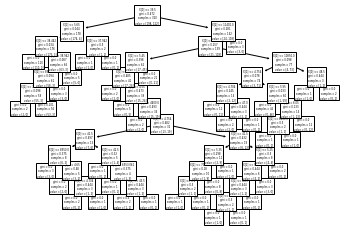

In [14]:
#Visualization of the tree
tree.plot_tree(acd)

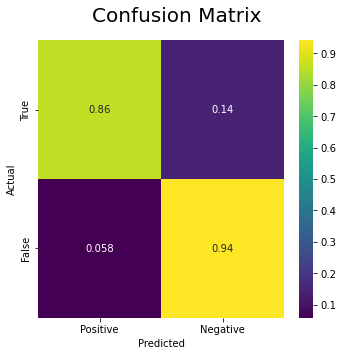

In [15]:
#Matrix Confusion
cm = confusion_matrix( y_test, y_pred, labels=[True, False])
cmn = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])#*100
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cmn,annot=True, cmap='viridis', xticklabels=["Positive", "Negative"], yticklabels=[True, False])
plt.suptitle("Confusion Matrix", fontsize= 20)
plt.ylabel('Actual')
plt.xlabel('Predicted')

save_fig("matrix_confusion")
plt.show()

In [16]:
cm # Confusion matrix

array([[24,  4],
       [ 3, 49]], dtype=int64)

In [17]:
#classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.89      0.86      0.87        28

    accuracy                           0.91        80
   macro avg       0.91      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80



In [18]:
# Getting precision, recall, F1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
acc = round(acc, 2)
print('accuracy:', acc)

prc = precision_score(y_test, y_pred)
prc = round(prc, 2)
print('precision_score:', prc)

rcll = recall_score(y_test, y_pred)
rcll = round(rcll, 2)
print('recall_score:', rcll)

f1scr = f1_score(y_test, y_pred)
f1scr = round(f1scr, 2)
print('f1_score:', f1scr)

accuracy: 0.91
precision_score: 0.89
recall_score: 0.86
f1_score: 0.87


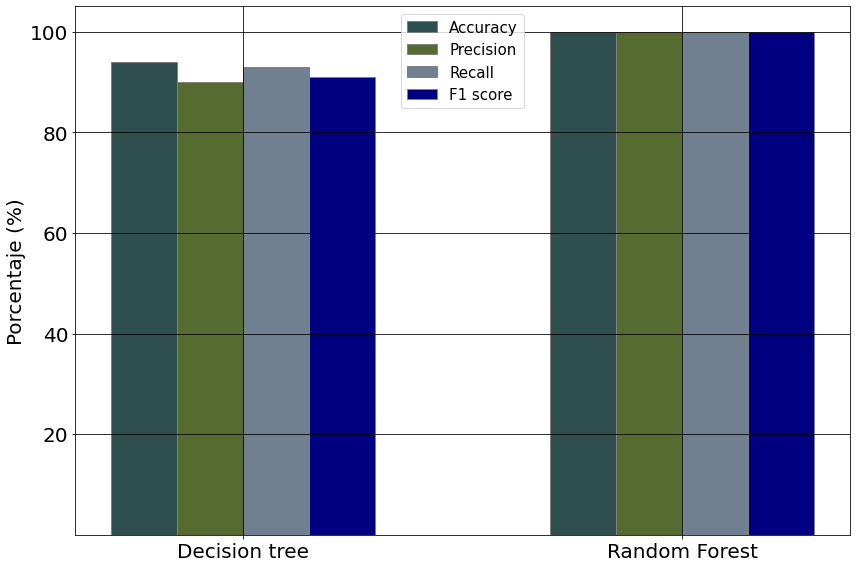

In [19]:
# Ploting accuracy, precision_score, recall_score, f1_score

# Set width of bar
barWidth = 0.15
fig = plt.subplots(figsize=(12, 8))

# Set height of bar

models = ['Decision tree', 'Random Forest']
accuracy = [94, 100]
precision = [90, 100]
recall = [93, 100]
f1_score = [91, 100]

# St positions of bat on X axis
pos1_acc = np.arange(len(accuracy))
pos2_pre = [x + barWidth for x in pos1_acc]
pos3_rec = [x + barWidth for x in pos2_pre]
pos4_f1 = [x + barWidth for x in pos3_rec]

# Mat the plot
plt.bar(pos1_acc, accuracy, color='darkslategray', width=barWidth, 
    edgecolor='grey', label='Accuracy')
plt.bar(pos2_pre, precision, color='darkolivegreen', width=barWidth,
    edgecolor='grey', label='Precision')
plt.bar(pos3_rec, recall, color='slategray', width=barWidth,
    edgecolor='grey', label='Recall')
plt.bar(pos4_f1, f1_score, color='navy', width=barWidth,
    edgecolor='grey', label='F1 score')


# Adding Xticks
plt.ylabel('Porcentaje (%)', fontsize=20)
plt.xticks([r + 1.5*barWidth for r in range(len(accuracy))], models, fontsize=20)
plt.yticks([20, 40, 60, 80, 100], fontsize=20)

plt.legend(fontsize=15, loc="upper center")
plt.grid(color="black")
save_fig("comparison_models")

plt.show()

In [20]:
# Getting probabilities
y_pred_proba = acd.predict_proba(x_test)
y_score = y_pred_proba[:, 1]

In [21]:
l = list(y_score)
l.count(1)

27

In [22]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_score)
threshold = 0.5

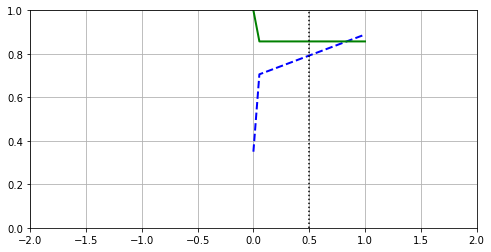

In [23]:
# Plotting precision and recall of threshold
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# Beautifies the figure
#idx = (thresholds >= threshold).argmax() # First index
#plt.plot(thresholds[idx], precisions[idx], "bo")
#plt.plot(thresholds[idx], recalls[idx], "go")

plt.axis([-2, 2, 0, 1])
plt.grid()

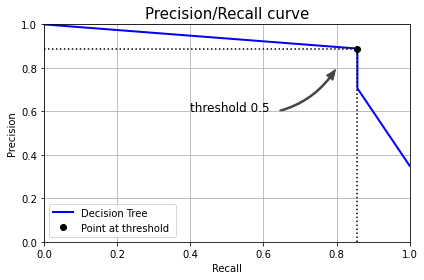

In [24]:
import matplotlib.patches as patches # extra-code - for the curved arrow

# Plot the curve
plt.plot(recalls, precisions, "b-", linewidth=2, label="Decision Tree")

# Plot the dot

idx = (thresholds >= threshold).argmax()
plt.plot([recalls[idx]], [precisions[idx]], "ko", label="Point at threshold ")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.64, 0.6), (0.8, 0.8),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"
))

plt.text(0.40, 0.6, "threshold 0.5", fontsize=12)
plt.title("Precision/Recall curve", fontsize=15)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.axis([0, 1, 0, 1])
plt.grid()

save_fig("Precision_recall")
plt.show()

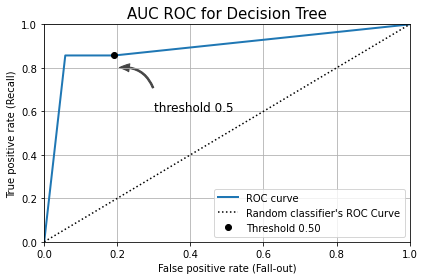

In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_score)

idx = (thresholds <= threshold).argmax()

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], "k:", label="Random classifier's ROC Curve")
plt.plot([fpr[idx]], [tpr[idx]], "ko", label="Threshold 0.50")

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.3, 0.7), (0.2, 0.8),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))

plt.text(0.3, 0.6, "threshold 0.5", fontsize=12)
plt.title("AUC ROC for Decision Tree", fontsize=15)
plt.ylabel("True positive rate (Recall)")
plt.xlabel("False positive rate (Fall-out)")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend()

save_fig("AUC ROC")
plt.show()

In [26]:
# Plotting ROC AUC
from sklearn.metrics import roc_auc_score

roc_auc_scr = roc_auc_score(y_test, y_score)
print('roc_auc_scr:', roc_auc_scr)

roc_auc_scr: 0.8901098901098901


In [27]:
#MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"The Mean Absolute Error is :", mae)
print(f"The Root Mean Squared Erros is:",rmse)

The Mean Absolute Error is : 0.0875
The Root Mean Squared Erros is: 0.2958039891549808


In [28]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)